# Introduction

Hey, thanks for viewing my Kernel!

If you like my work, please, leave an upvote: it will be really appreciated and it will motivate me in offering more content to the Kaggle community ! 😊

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter("ignore")
train = pd.read_csv('../input/tabular-playground-series-feb-2022/train.csv')
test = pd.read_csv('../input/tabular-playground-series-feb-2022/test.csv')
sub = pd.read_csv('../input/tabular-playground-series-feb-2022/sample_submission.csv')

display(train.head())
display(sub.head())

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae


,row_id,target
0,200000,Streptococcus_pneumoniae
1,200001,Streptococcus_pneumoniae
2,200002,Streptococcus_pneumoniae
3,200003,Streptococcus_pneumoniae
4,200004,Streptococcus_pneumoniae


In [2]:
display(train.shape)
display(test.shape)

(200000, 288)

(100000, 287)

In [3]:
train.drop('row_id', axis=1, inplace=True)
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
object_cols = list(set(train.columns) - set(numeric_cols))
print('numeric cols len: ', len(numeric_cols))
print('object col: ', object_cols)

numeric cols len:  286
object col:  ['target']


In [4]:
for col in numeric_cols:
    if len(train[col].unique()) < 10:
        print(train[col].unique())

In [5]:
train.isna().sum().sum()

0

In [6]:
duplicates_train = train.duplicated().sum()
duplicates_train

76007

In [7]:
train.drop_duplicates(keep='first', inplace=True)
train.shape

(123993, 287)

In [8]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        col_type = df[col].dtypes

        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2

    if verbose:
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
 
    return df

In [9]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

Mem. usage decreased to 137.17 Mb (49.7% reduction)
Mem. usage decreased to 109.48 Mb (50.0% reduction)


# Distribution

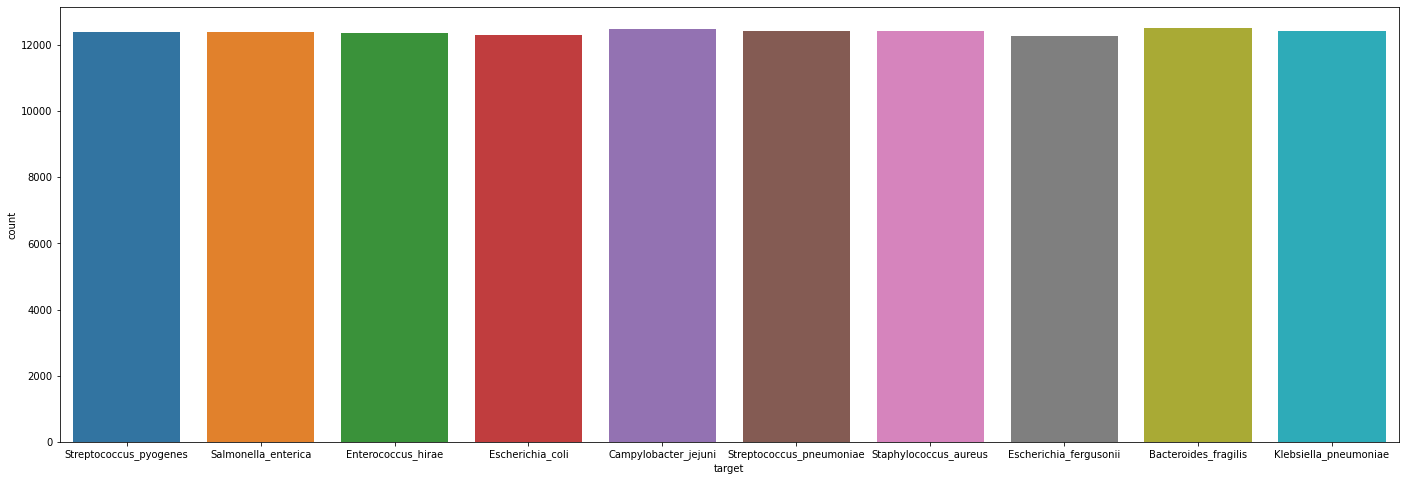

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(24, 8))
sns.countplot(train['target'], ax=ax);

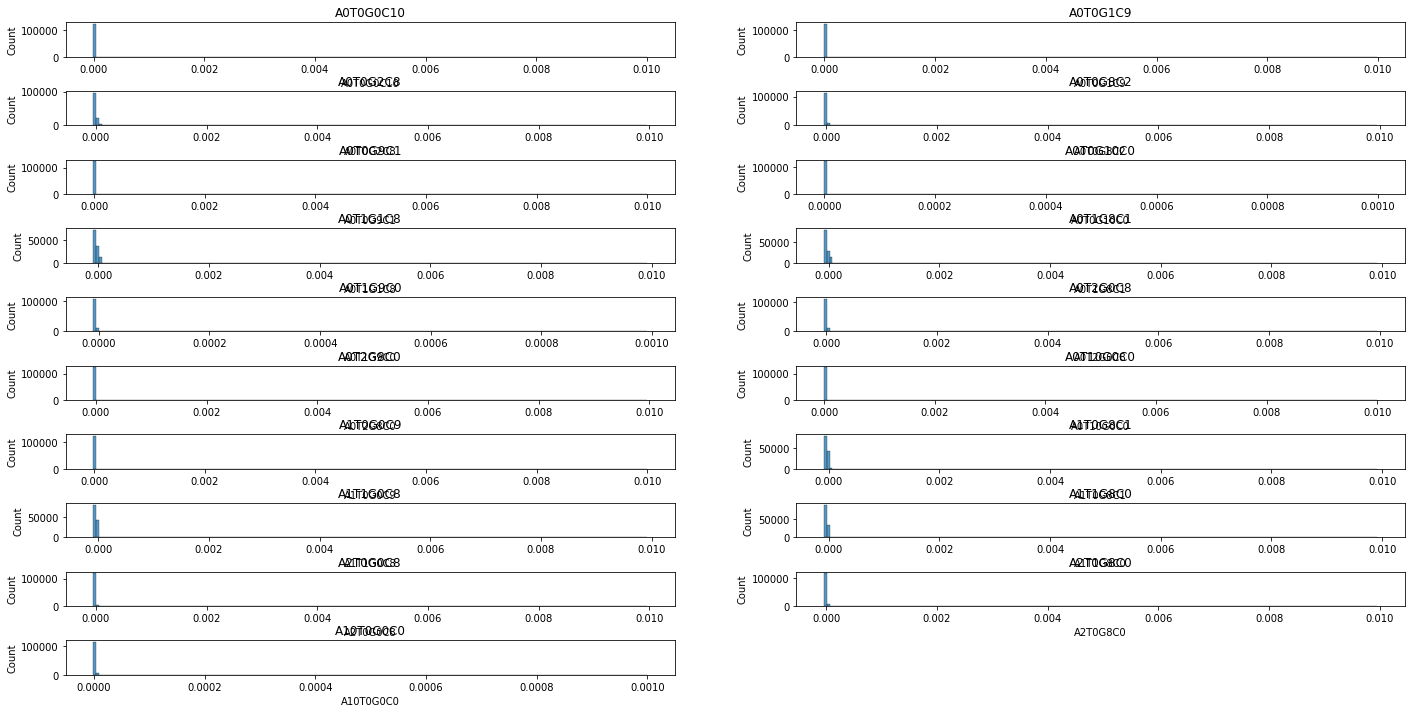

In [11]:
from scipy.stats import skew, boxcox

skew_cols = []
for col in numeric_cols:
    skew_value = skew(train[col])
    if abs(skew_value) > 50:
        skew_cols.append(col)

ncols = 2
nrows = round(len(skew_cols) / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(24, 12))
plt.subplots_adjust(hspace=1)

index = 0
for row in range(nrows):
    for col in range(ncols):
        try:
            col_name = skew_cols[index]
        except:
            axes[row][col].set_visible(False)
            index += 1
            continue
        
        sns.histplot(train[col_name], ax=axes[row][col], bins=np.linspace(train[col_name].min(), train[col_name].max(), 201))
        axes[row][col].set_title(col_name);
        index += 1

In [12]:
import umap

embedding = umap.UMAP(n_neighbors=10,
                      min_dist=0.3,
                      metric='correlation').fit_transform(train.drop(['target'], axis=1))

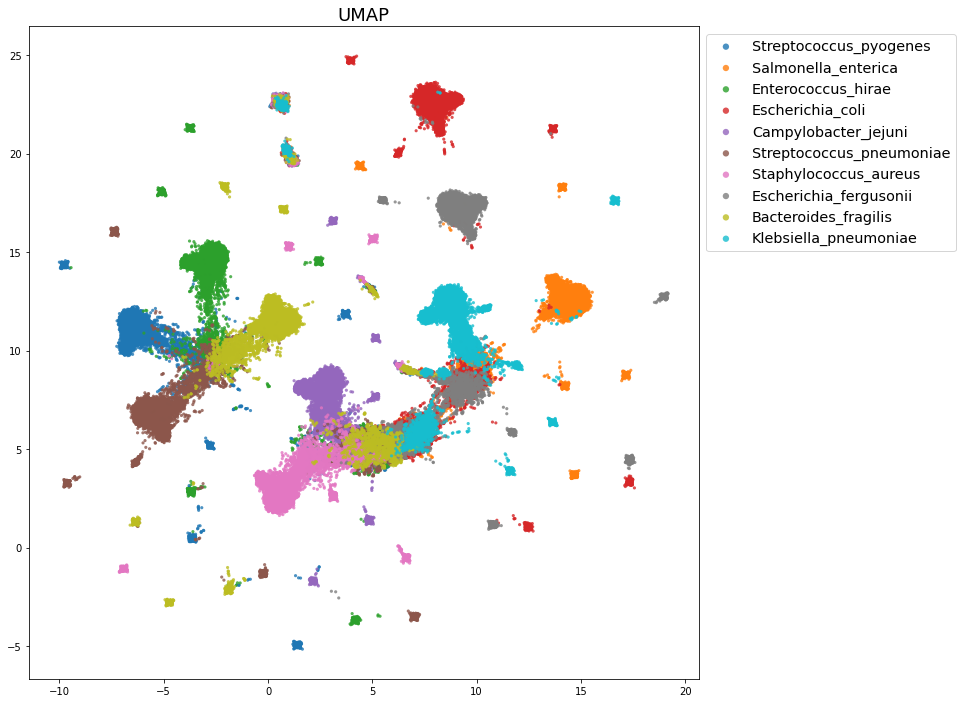

In [13]:
colors = pd.factorize(train.loc[:, 'target'])
colors_dict = {
        0: 'Streptococcus_pyogenes',
        1: 'Salmonella_enterica',
        2: 'Enterococcus_hirae',
        3: 'Escherichia_coli',
        4: 'Campylobacter_jejuni',
        5: 'Streptococcus_pneumoniae',
        6: 'Staphylococcus_aureus',
        7: 'Escherichia_fergusonii',
        8: 'Bacteroides_fragilis',
        9: 'Klebsiella_pneumoniae'
}
color_list = sns.color_palette(None, 10)

fig, ax = plt.subplots(figsize=(12,12))
for color_key in colors_dict.keys():
    indexs = colors[0] == color_key
    temp_embedding = embedding[indexs, :]
    ax.scatter(temp_embedding[:, 0], temp_embedding[:, 1], 
                c=color_list[color_key], 
                edgecolor='none', 
                alpha=0.80,
                label=colors_dict[color_key],
                s=10)
plt.legend(bbox_to_anchor=(1, 1), fontsize="x-large", markerscale=2.)
plt.title('UMAP', fontsize=18);

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=2000, random_state=42)

In [15]:
tsne_data = tsne.fit_transform(train.drop(['target'], axis=1))

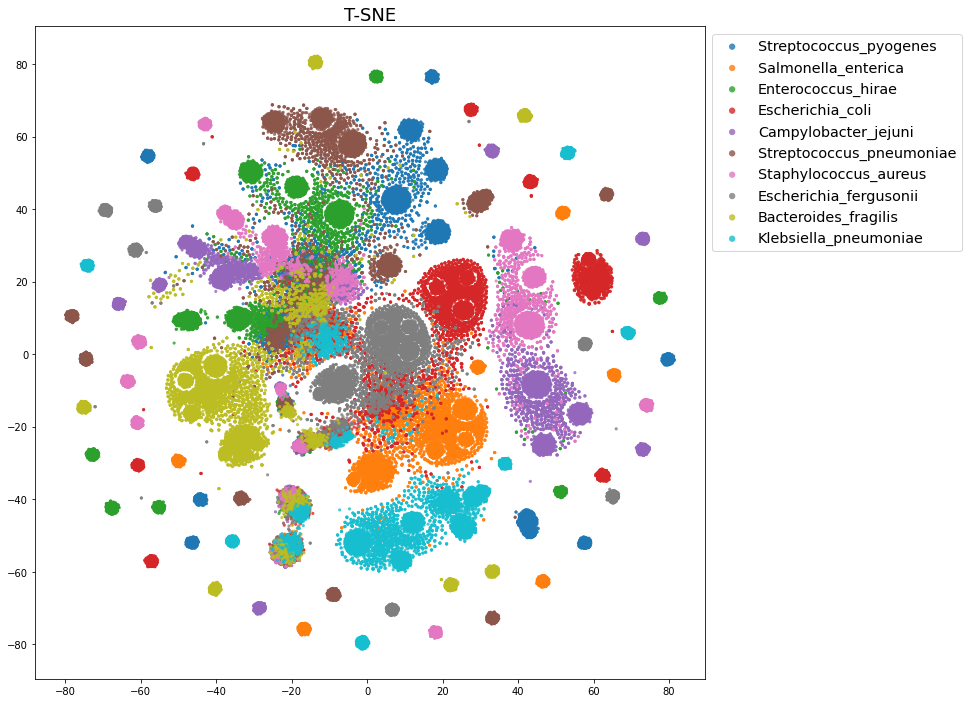

In [16]:
fig, ax = plt.subplots(figsize=(12,12))
for color_key in colors_dict.keys():
    indexs = colors[0] == color_key
    temp_tsne = tsne_data[indexs, :]
    ax.scatter(temp_tsne[:, 0], temp_tsne[:, 1], 
                c=color_list[color_key], 
                edgecolor='none', 
                alpha=0.80,
                label=colors_dict[color_key],
                s=10)
plt.legend(bbox_to_anchor=(1, 1), fontsize="x-large", markerscale=2.)
plt.title('T-SNE', fontsize=18);

# P-Values

In [17]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
targets =  pd.DataFrame(enc.fit_transform(train[['target']]))
targets.columns = list(enc.categories_[0])
targets.head()

,Bacteroides_fragilis,Campylobacter_jejuni,Enterococcus_hirae,Escherichia_coli,Escherichia_fergusonii,Klebsiella_pneumoniae,Salmonella_enterica,Staphylococcus_aureus,Streptococcus_pneumoniae,Streptococcus_pyogenes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from scipy.stats import pearsonr

p_values_target_list = []
for target in targets.columns:
    p_values_list = []
    for c in numeric_cols:
        p = round(pearsonr(targets.loc[:,target], train.loc[:,c])[1], 4)
        p_values_list.append(p)
    p_values_target_list.append(p_values_list)
p_values_target_list = np.array(p_values_target_list)
p_values_target_list = p_values_target_list.reshape(286, 10)
p_values_df = pd.DataFrame(p_values_target_list, columns=list(enc.categories_[0]), index=numeric_cols)

def p_value_warning_background(cell_value):
    highlight = 'background-color: lightcoral;'
    default = ''
    if cell_value > 0.05:
            return highlight
    return default

p_values_df.style.applymap(p_value_warning_background)

,Bacteroides_fragilis,Campylobacter_jejuni,Enterococcus_hirae,Escherichia_coli,Escherichia_fergusonii,Klebsiella_pneumoniae,Salmonella_enterica,Staphylococcus_aureus,Streptococcus_pneumoniae,Streptococcus_pyogenes
A0T0G0C10,0.392700,0.512700,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.404900
A0T0G1C9,0.000000,0.660200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A0T0G2C8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001900
A0T0G3C7,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.002100,0.000000,0.000000
A0T0G4C6,0.000000,0.000000,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A0T0G5C5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014100,0.000000,0.000000
A0T0G6C4,0.000000,0.000000,0.000000,0.000000,0.000000,0.049500,0.318200,0.001400,0.000000,0.000000
A0T0G7C3,0.000000,0.000000,0.000000,0.000000,0.000700,0.000000,0.000000,0.000400,0.000000,0.000000
A0T0G8C2,0.000000,0.000000,0.000000,0.263600,0.000000,0.000000,0.000000,0.124900,0.000000,0.000000
A0T0G9C1,0.000000,0.182700,0.012300,0.000000,0.000000,0.000000,0.000000,0.097200,0.002700,0.000000


In [19]:
important_dict = {}
for index, col in enumerate(p_values_df.columns):
    important_dict[col] = list(p_values_df.loc[p_values_df[col].values > 0.05, col].index)

# Correlations

In [20]:
import gc
gc.collect()

all_feature_corr = train[numeric_cols].corr()
upper = all_feature_corr.where(np.triu(np.ones(all_feature_corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
to_drop

[]

In [21]:
targets_train = targets.merge(train.drop('target', axis=1), left_index=True, right_index=True)
all_target_corr = targets_train.corr()

In [22]:
nrows = 10
low_corr = []
th = 0.0001
for i in range(nrows):
    low_cor_values = all_target_corr.iloc[i, :].abs()[all_target_corr.iloc[i, :].abs() < th]
    low_corr.append(low_cor_values)

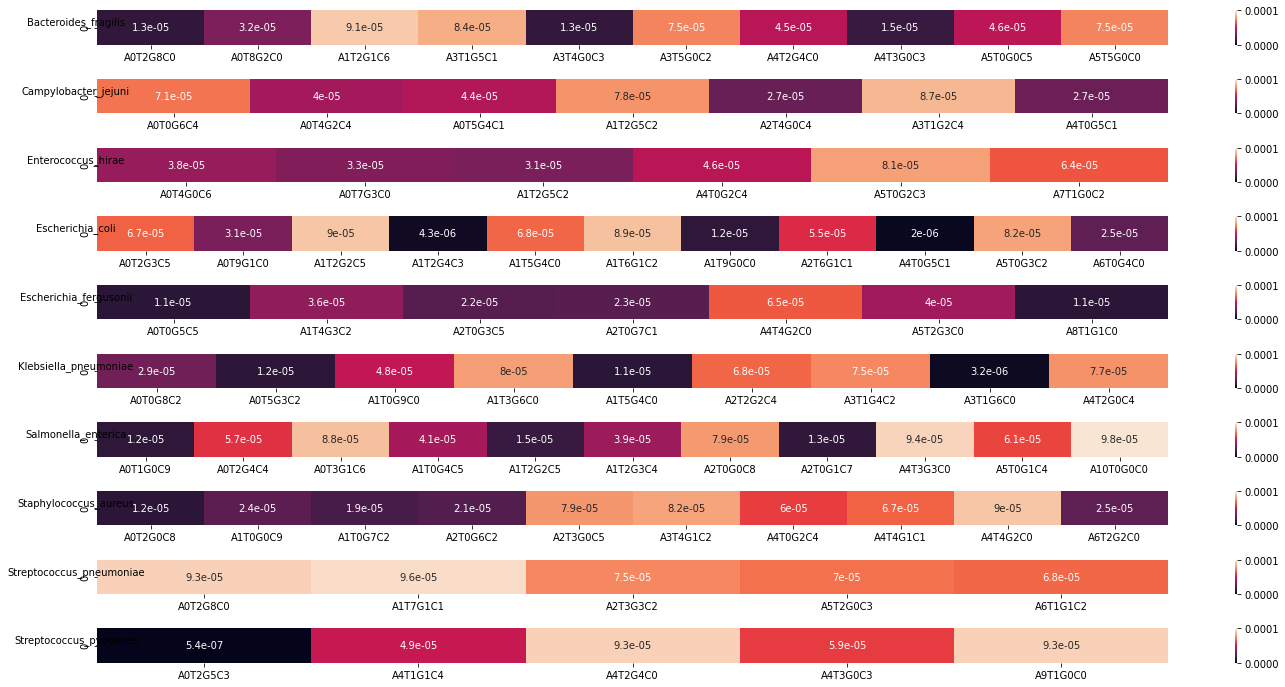

In [23]:
ignore_dict = {}
fig, axes = plt.subplots(nrows, 1, figsize=(24, 12))
plt.subplots_adjust(hspace=1)
for i in range(nrows):
    sns.heatmap(low_corr[i:i+1], annot=True, vmin=0, vmax=th, ax=axes[i])
    axes[i].set_xticklabels(list(low_corr[i].index))
    axes[i].set_ylabel(targets.columns[i], rotation=0);
    ignore_dict[targets.columns[i]] = list(low_corr[i].index)

# Ignore Cols

In [24]:
print(ignore_dict)

{'Bacteroides_fragilis': ['A0T2G8C0', 'A0T8G2C0', 'A1T2G1C6', 'A3T1G5C1', 'A3T4G0C3', 'A3T5G0C2', 'A4T2G4C0', 'A4T3G0C3', 'A5T0G0C5', 'A5T5G0C0'], 'Campylobacter_jejuni': ['A0T0G6C4', 'A0T4G2C4', 'A0T5G4C1', 'A1T2G5C2', 'A2T4G0C4', 'A3T1G2C4', 'A4T0G5C1'], 'Enterococcus_hirae': ['A0T4G0C6', 'A0T7G3C0', 'A1T2G5C2', 'A4T0G2C4', 'A5T0G2C3', 'A7T1G0C2'], 'Escherichia_coli': ['A0T2G3C5', 'A0T9G1C0', 'A1T2G2C5', 'A1T2G4C3', 'A1T5G4C0', 'A1T6G1C2', 'A1T9G0C0', 'A2T6G1C1', 'A4T0G5C1', 'A5T0G3C2', 'A6T0G4C0'], 'Escherichia_fergusonii': ['A0T0G5C5', 'A1T4G3C2', 'A2T0G3C5', 'A2T0G7C1', 'A4T4G2C0', 'A5T2G3C0', 'A8T1G1C0'], 'Klebsiella_pneumoniae': ['A0T0G8C2', 'A0T5G3C2', 'A1T0G9C0', 'A1T3G6C0', 'A1T5G4C0', 'A2T2G2C4', 'A3T1G4C2', 'A3T1G6C0', 'A4T2G0C4'], 'Salmonella_enterica': ['A0T1G0C9', 'A0T2G4C4', 'A0T3G1C6', 'A1T0G4C5', 'A1T2G2C5', 'A1T2G3C4', 'A2T0G0C8', 'A2T0G1C7', 'A4T3G3C0', 'A5T0G1C4', 'A10T0G0C0'], 'Staphylococcus_aureus': ['A0T2G0C8', 'A1T0G0C9', 'A1T0G7C2', 'A2T0G6C2', 'A2T3G0C5', 'A

# Important Cols

In [25]:
print(important_dict)

{'Bacteroides_fragilis': ['A0T0G0C10', 'A1T2G2C5', 'A1T3G2C4', 'A1T8G1C0', 'A2T0G1C7', 'A2T2G5C1', 'A3T2G5C0', 'A3T3G2C2', 'A3T4G3C0', 'A4T0G4C2', 'A5T1G2C2', 'A5T3G0C2', 'A6T0G1C3', 'A6T4G0C0'], 'Campylobacter_jejuni': ['A0T0G0C10', 'A0T0G1C9', 'A0T0G9C1', 'A0T1G1C8', 'A0T1G2C7', 'A0T8G0C2', 'A0T8G2C0', 'A1T1G2C6', 'A1T4G3C2', 'A2T0G0C8', 'A2T0G7C1', 'A2T2G0C6', 'A2T2G6C0', 'A3T1G4C2', 'A3T1G6C0', 'A3T7G0C0', 'A4T3G2C1', 'A6T1G1C2', 'A6T2G2C0', 'A7T1G2C0'], 'Enterococcus_hirae': ['A0T0G4C6', 'A0T2G5C3', 'A0T8G2C0', 'A1T2G1C6', 'A1T3G0C6', 'A1T4G0C5', 'A1T5G3C1', 'A1T7G0C2', 'A2T7G0C1', 'A4T0G4C2', 'A5T0G3C2', 'A5T1G2C2', 'A6T1G0C3', 'A6T2G2C0', 'A7T0G3C0', 'A7T1G2C0', 'A8T1G1C0', 'A9T0G0C1'], 'Escherichia_coli': ['A0T0G8C2', 'A0T2G3C5', 'A0T4G1C5', 'A0T7G2C1', 'A1T0G1C8', 'A1T2G7C0', 'A1T7G0C2', 'A2T4G2C2', 'A2T7G1C0', 'A3T0G0C7', 'A3T6G1C0', 'A3T7G0C0', 'A4T0G4C2', 'A5T0G5C0', 'A5T1G1C3', 'A7T0G1C2', 'A9T0G0C1'], 'Escherichia_fergusonii': ['A0T0G10C0', 'A0T1G4C5', 'A1T1G4C4', 'A1T2G7

# Modeling

In [26]:
from termcolor import colored
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

for index, col_key in enumerate(targets.columns):
    y = targets[col_key]
    X_col = list(set(numeric_cols) - set(ignore_dict[col_key]))
    
    clf = GaussianNB()
    base_score = cross_val_score(clf, train[numeric_cols], y, cv=3, scoring='balanced_accuracy').mean()
    new_score = cross_val_score(clf, train[X_col], y, cv=3, scoring='balanced_accuracy').mean()
    
    if new_score > base_score:
        print(colored(col_key, 'green'), '- base accuracy score:', base_score, '| new accuracy score:', new_score)
    elif base_score > new_score:
        print(colored(col_key, 'red'), '- base accuracy score:', base_score, '| new accuracy score:', new_score)
    else:
        print(colored(col_key, 'grey'), '- base accuracy score:', base_score, '| new accuracy score:', new_score)

Bacteroides_fragilis - base accuracy score: 0.6733348896866508 | new accuracy score: 0.6748331274551321
Campylobacter_jejuni - base accuracy score: 0.7449037877772953 | new accuracy score: 0.7471220543248189
Enterococcus_hirae - base accuracy score: 0.7351617671913623 | new accuracy score: 0.734690150424569
Escherichia_coli - base accuracy score: 0.7020471383065017 | new accuracy score: 0.7014170703780752
Escherichia_fergusonii - base accuracy score: 0.6832276811168206 | new accuracy score: 0.6835736839281795
Klebsiella_pneumoniae - base accuracy score: 0.7998489777992884 | new accuracy score: 0.7998531604121667
Salmonella_enterica - base accuracy score: 0.7102358630738813 | new accuracy score: 0.7102496398564621
Staphylococcus_aureus - base accuracy score: 0.8010215150281904 | new accuracy score: 0.8009905064197506
Streptococcus_pneumoniae - base accuracy score: 0.7541083711381239 | new accuracy score: 0.7558244942706812
Streptococcus_pyogenes - base accuracy score: 0.7598985563818251

# Important Note

Don't forget, the corr function finds only a linear relationship. Deleting columns according to corr score is not true. In this work, we deleted columns according to corr score because of data size.